# Análisis de Datos
 ## Se visualizan los datos importados y preprocesados con anterioridad.
 
 ### Trabajo de Fin de Grado - Universidad de Burgos
 #### Jesús García Armario

In [9]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [10]:
# Cargamos los datos
df = pd.read_excel('ListadoInterv_Preprocesado.xlsx')
# Visualizamos la estructura de los datos
df.head()

,Unnamed: 0,NHC,INTERVENCIÓN,TIPO,TURNO,CARÁCTER ECONÓMICO,PONDERACIÓN,DURACIÓN,ESPECIALIDAD
0,0,1000738,86.7,1,1,33,33,29,PLASTICA
1,1,1001107,86.4,1,0,36,36,33,PLASTICA
2,2,1001240,86.4,1,0,18,7,65,PLASTICA
3,3,1001395,86.4,1,0,55,55,60,PLASTICA
4,4,1001623,86.7,1,1,146,146,42,PLASTICA


In [11]:
# Visualizamos los tipos de datos
df.info()
# Eliminamos la primera columna
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25493 entries, 0 to 25492
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          25493 non-null  int64  
 1   NHC                 25493 non-null  int64  
 2   INTERVENCIÓN        25493 non-null  float64
 3   TIPO                25493 non-null  int64  
 4   TURNO               25493 non-null  object 
 5   CARÁCTER ECONÓMICO  25493 non-null  int64  
 6   PONDERACIÓN         25493 non-null  int64  
 7   DURACIÓN            25493 non-null  int64  
 8   ESPECIALIDAD        25493 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25493 entries, 0 to 25492
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NHC                 25493 non-null  int64  
 1   INTERVENCIÓN        25493 non-n

<AxesSubplot:>

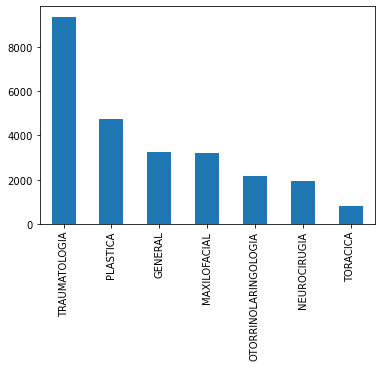

In [12]:
# Mostramos el número de intervenciones por especialidad
# Lo mostramos en un gráfico
df['ESPECIALIDAD'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='TIPO', ylabel='count'>

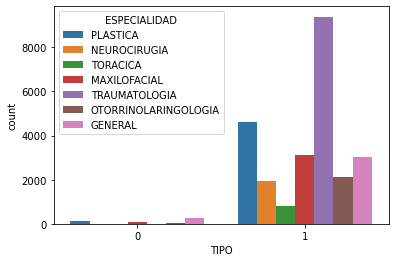

In [13]:
# Vemos si hay relación entre la especialidad y el tipo de intervención
# Lo mostramos en un gráfico
sns.countplot(x='TIPO', hue='ESPECIALIDAD', data=df)

<AxesSubplot:xlabel='ESPECIALIDAD', ylabel='DURACIÓN'>

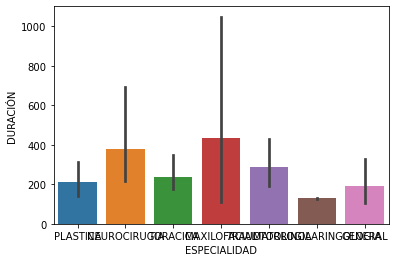

In [14]:
# Vemos si hay diferencias en la duración media de las intervenciones según la especialidad
# Lo mostramos en un gráfico
sns.barplot(x='ESPECIALIDAD', y='DURACIÓN', data=df)

<AxesSubplot:>

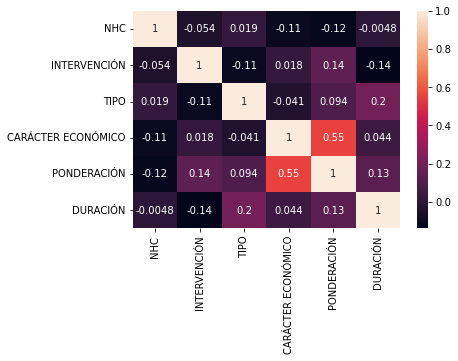

In [15]:
# Determinamos la correlación de Spearman entre las variables
sns.heatmap(df.corr(method='spearman'), annot=True)

<AxesSubplot:>

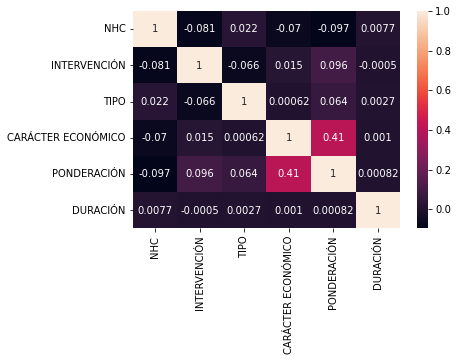

In [16]:
# Determinamos la correlación de Pearson entre las variables
sns.heatmap(df.corr(method='pearson'), annot=True)

La duración media de las intervenciones de neurocirugía es de 376.9467425025853 minutos con un intervalo de confianza de 302.015347944062 minutos
La duración media de las intervenciones de cirugía plástica es de 211.193656794791 minutos con un intervalo de confianza de 88.40524792032947 minutos
La duración media de las intervenciones de cirugía torácica es de 236.75156838143036 minutos con un intervalo de confianza de 106.45235726583783 minutos


<BarContainer object of 3 artists>

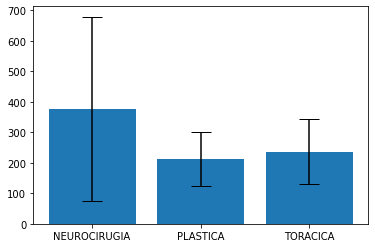

In [17]:
# Vemos si hay relación entre la duración de la intervención y la especialidad
# Se realiza mediante comparación de medias

# Primero separamos los datos en tres grupos según la especialidad
df_neuro = df[df['ESPECIALIDAD'] == 'NEUROCIRUGIA']
df_plast = df[df['ESPECIALIDAD'] == 'PLASTICA']
df_tora = df[df['ESPECIALIDAD'] == 'TORACICA']

# Calculamos la media de la duración de las intervenciones de cada especialidad
media_neuro = df_neuro['DURACIÓN'].mean()
media_plast = df_plast['DURACIÓN'].mean()
media_tora = df_tora['DURACIÓN'].mean()

# Calculamos la desviación típica de la duración de las intervenciones de cada especialidad
desv_neuro = df_neuro['DURACIÓN'].std()
desv_plast = df_plast['DURACIÓN'].std()
desv_tora = df_tora['DURACIÓN'].std()

# Calculamos el número de intervenciones de cada especialidad
n_neuro = len(df_neuro)
n_plast = len(df_plast)
n_tora = len(df_tora)

# Calculamos el intervalo de confianza de la duración de las intervenciones de cada especialidad
intervalo_neuro = 1.96 * desv_neuro / np.sqrt(n_neuro)
intervalo_plast = 1.96 * desv_plast / np.sqrt(n_plast)
intervalo_tora = 1.96 * desv_tora / np.sqrt(n_tora)

# Mostramos los resultados
print('La duración media de las intervenciones de neurocirugía es de', media_neuro, 'minutos con un intervalo de confianza de', intervalo_neuro, 'minutos')
print('La duración media de las intervenciones de cirugía plástica es de', media_plast, 'minutos con un intervalo de confianza de', intervalo_plast, 'minutos')
print('La duración media de las intervenciones de cirugía torácica es de', media_tora, 'minutos con un intervalo de confianza de', intervalo_tora, 'minutos')

# Lo representamos en un gráfico
plt.bar(['NEUROCIRUGIA', 'PLASTICA', 'TORACICA'], [media_neuro, media_plast, media_tora], yerr=[intervalo_neuro, intervalo_plast, intervalo_tora], capsize=10)

In [18]:
# Imprimimos los resultados
f,p = stats.f_oneway(df_neuro['DURACIÓN'], df_plast['DURACIÓN'], df_tora['DURACIÓN'])
print('El valor de la estadística F es', f)
print('El valor del p-valor es', p)
# Comprobamos si son diferentes el tipo de intervención y la especialidad
# Se realiza mediante prueba de chi-cuadrado
chi,p,dof,expected = stats.chi2_contingency(pd.crosstab(df['TIPO'], df['ESPECIALIDAD']))
print('El valor del estadístico chi-cuadrado es', chi)
print('El valor del p-valor es', p)
print('La matriz de frecuencias esperadas es', expected)
# Realizamos una prueba de normalidad de los datos
# Se realiza mediante prueba de Shapiro-Wilk
stat,p = stats.shapiro(df['DURACIÓN'])
print('El valor de la estadística es', stat)
print('El valor del p-valor es', p)

El valor de la estadística F es 1.044445964235172
El valor del p-valor es 0.35193797415619593
El valor del estadístico chi-cuadrado es 837.6034936544216
El valor del p-valor es 1.1528512980776866e-177
La matriz de frecuencias esperadas es [[  61.82202958   60.74208606   36.64229396   40.58314047   90.20370298
    15.10026282  177.90648413]
 [3201.17797042 3145.25791394 1897.35770604 2101.41685953 4670.79629702
   781.89973718 9212.09351587]]
El valor de la estadística es 0.0067008137702941895
El valor del p-valor es 0.0


c:\Users\Jesus\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
